<a href="https://colab.research.google.com/github/vir-dom/deep_learning_hw5/blob/main/deep_learning_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning homework 5

This is the fifth homework for the "Deep Learning a gyakorlatban..." course. My name is Virsinger Dominika (RSABSD). In this notebook I am trying to explain everything regarding my codes, sometimes it is going to be in these Text boxes, sometimes right next to the code as comments.

For this homework I used the codes that we used during the practice lesson.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Dropout, Activation
from tensorflow.keras import Input
from keras.callbacks import EarlyStopping
import numpy as np
from PIL import Image
import pickle
path = 'cifar-10-batches-py/data_batch_'

**Loading the data**

This code will appear in the data() function of the upcoming hyperparameter optimization. These lines are to test that the code actually functions.

The dataset is all CIFAR-10 images found on https://www.cs.toronto.edu/~kriz/cifar.html. I downloaded CIFAR-10 python version found on the linked website, extracted the .tar.gz file, and gotten a folder called cifar-10-batches-py. The code below should work if it was obtained the same way.

First I'll load all 5 given batches and the test batch, split them into pictures and labels, and append the 5 train batches into 1:

In [2]:
batches = []
for i in range(5):
    with open(path + str(i+1), 'rb') as f:
        batches.append(pickle.load(f, encoding='bytes'))

In [3]:
pictures = batches[0][b'data']
labels = batches[0][b'labels']
for b in batches[1:]:
    pictures = np.append(pictures,b[b'data'], axis=0)
    labels = np.append(labels,b[b'labels'], axis=0)

In [4]:
with open('cifar-10-batches-py/test_batch', 'rb') as f:
    test_batch = pickle.load(f, encoding='bytes')
test_pictures = test_batch[b'data']
test_labels = test_batch[b'labels']

There are 50000 train images and 10000 test images. Each one contains 32x32x3=3072 data points (colored RGB pixels):

In [5]:
pictures.shape, test_pictures.shape

((50000, 3072), (10000, 3072))

Similarly, there are 50000 train labels and 10000 test labels:

In [6]:
len(labels), len(test_labels)

(50000, 10000)

**Showing the data**

Here I'm reshaping and transposing the data to show some examples of the images and labels. There are 10 possible labels, and I'm printing out the first 10 images (scaled up to 100x100 from 32x32).

In [7]:
pictures_to_show = pictures.reshape(50000,3,32,32)
test_pictures_to_show = test_pictures.reshape(10000,3,32,32)

In [8]:
pictures_to_show.shape, test_pictures_to_show.shape

((50000, 3, 32, 32), (10000, 3, 32, 32))

In [9]:
label_dict = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
    4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

Example images (scaled up to 100x100):
---------------
frog


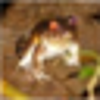


truck


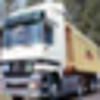


truck


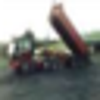


deer


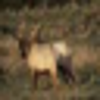


automobile


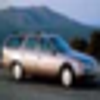


automobile


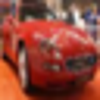


bird


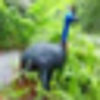


horse


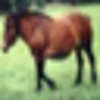


ship


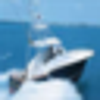


cat


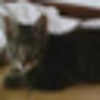

In [10]:
print("Example images (scaled up to 100x100):")
print("---------------")
for i in range(10):
    print(label_dict[batches[0][b'labels'][i]])
    image = Image.fromarray(np.transpose(pictures_to_show[i], axes=(1,2,0)), 'RGB').resize((100,100))
    display(image)
    print("")

**Neural Network**

I'm transforming the data by turning the output into a categorical variable and normalizing the input data to be in [0,1] (by dividing it by 255).
<p>Then I'm creating a simple Sequential model with 2 Dense layers simply to show how hyperparameter optimization works. Obviously, for image recognition, a Convolutional Neural Network would be wiser to use, however, it would run much slower, and accuracy isn't key here - only to learn about hyperopt.

In [11]:
batch_size = 32
num_classes = 10
epochs = 20

In [12]:
labels = keras.utils.to_categorical(labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [13]:
pictures = pictures.astype('float32')
test_pictures = test_pictures.astype('float32')
pictures /= 255
test_pictures /= 255

In [14]:
model = Sequential()
model.add(Dense(256, input_dim=3072))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3, verbose=0)]

In [17]:
result = model.fit(pictures, labels,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_pictures, test_labels),
              callbacks=callbacks,
              shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 2.1617 - accuracy: 0.2972 - val_loss: 1.9679 - val_accuracy: 0.3030
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9154 - accuracy: 0.3238 - val_loss: 1.9456 - val_accuracy: 0.3138
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8809 - accuracy: 0.3337 - val_loss: 1.8554 - val_accuracy: 0.3538
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8466 - accuracy: 0.3485 - val_loss: 1.7989 - val_accuracy: 0.3603
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8325 - accuracy: 0.3499 - val_loss: 1.7808 - val_accuracy: 0.3728
Epoch 6/20
1563/1563 [==============================] - 13s 9ms/step - loss: 1.8273 - accuracy: 0.3547 - val_loss: 1.7831 - val_accuracy: 0.3737
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8165 - accuracy: 0.3604 - val_loss: 1.9457 - val_ac

The best accuracy without hyperopt is about 38.91%, which is far from great, but also much better than random (which would be 10%).

In [18]:
best_val_acc = np.amax(result.history['val_accuracy']) 
print('best val_acc:', best_val_acc)

best val_acc: 0.38909998536109924


**Hyperopt functions**

The following data() and create_model() functions are used by the hyperopt system and contain all the previously shown code.

In [50]:
def data():
    
    import keras
    from keras.models import Sequential
    from keras.layers import InputLayer, Dense, Dropout, Activation
    from tensorflow.keras import Input
    from keras.callbacks import EarlyStopping
    import numpy as np
    from PIL import Image
    import pickle
    from keras.layers import Layer
    from keras import backend as K

    path = 'cifar-10-batches-py/data_batch_'
    batches = []
    for i in range(5):
        with open(path + str(i+1), 'rb') as f:
            batches.append(pickle.load(f, encoding='bytes'))
    
    pictures = batches[0][b'data']
    labels = batches[0][b'labels']
    for b in batches[1:]:
        pictures = np.append(pictures,b[b'data'], axis=0)
        labels = np.append(labels,b[b'labels'], axis=0)
    
    with open('cifar-10-batches-py/test_batch', 'rb') as f:
        test_batch = pickle.load(f, encoding='bytes')
    test_pictures = test_batch[b'data']
    test_labels = test_batch[b'labels']
    
    batch_size = 32
    num_classes = 10
    epochs = 100
    
    labels = keras.utils.to_categorical(labels, num_classes)
    test_labels = keras.utils.to_categorical(test_labels, num_classes)
    
    pictures = pictures.astype('float32')
    test_pictures = test_pictures.astype('float32')
    pictures /= 255
    test_pictures /= 255
    
    print(pictures.shape, len(labels), test_pictures.shape, len(test_labels))
    
    return pictures, labels, test_pictures, test_labels

In [51]:
def create_model(pictures, labels, test_pictures, test_labels):
    
    from keras.layers import Layer
    from keras import backend as K
    
    # Definition of Swish
    class Swish(Layer):
        def __init__(self, beta, **kwargs):
            super(Swish, self).__init__(**kwargs)
            self.beta = K.cast_to_floatx(beta)

        def call(self, inputs):
            return K.sigmoid(self.beta * inputs) * inputs

        def get_config(self):
            config = {'beta': float(self.beta)}
            base_config = super(Swish, self).get_config()
            return dict(list(base_config.items()) + list(config.items()))

        def compute_output_shape(self, input_shape):
            return input_shape
    
    n_layer1 = {{choice([128, 256, 512])}}
    dropout = {{uniform(0, 0.5)}}
    n_layer2 = {{choice([128, 256, 512])}}
    
    act = {{choice(['relu', 'leakyrelu', 'swish'])}}
    optim = {{choice(['rmsprop', 'adam', 'sgd'])}}
    n_batch = {{choice([64, 128, 256])}}
    
    print('Model parameters: ', n_layer1, dropout, n_layer2, act, optim, n_batch)
    
    # activation: string -> variable
    if act == 'relu':
        activation = keras.layers.ReLU()
    elif act == 'leakyrelu':
        activation = keras.layers.LeakyReLU()
    elif act == 'swish':
        activation = Swish(beta=0.3)
    
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=3072))
    model.add(Dropout(dropout))
    model.add(Dense(n_layer2))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=optim,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_accuracy', patience=3, verbose=0)]
    
    result = model.fit(pictures, labels,
              batch_size=n_batch,
              epochs=100,
              verbose=2,
              validation_data=(test_pictures, test_labels),
              callbacks=callbacks,
              shuffle=True)

    
    # Save the epoch that gives the highest accuracy
    best_val_acc = np.amax(result.history['val_accuracy']) 
    print('best val_acc:', best_val_acc)
    
    # logs: network structure and results
    with open('hw5_hyperas-cifar10-log.csv', 'a') as csv_file:
        csv_file.write(str(n_layer1) + ';')
        csv_file.write(str(dropout) + ';')
        csv_file.write(str(n_layer2) + ';')
        csv_file.write(str(act) + ';')
        csv_file.write(str(optim) + ';')
        csv_file.write(str(n_batch) + ';')
        csv_file.write(str(best_val_acc) + '\n')
    
    return {'loss': -best_val_acc, 'status': STATUS_OK, 'model': model}

An output file is created to retain the parameters of all outputs from the hyperparameter optimization:

In [52]:
with open('hw5_hyperas-cifar10-log.csv', 'w') as csv_file:
    csv_file.write('n_layer1' + ';')
    csv_file.write('dropout' + ';')
    csv_file.write('n_layer2' + ';')
    csv_file.write('act' + ';')
    csv_file.write('optim' + ';')
    csv_file.write('n_batch' + ';')
    csv_file.write('best_val_acc' + '\n')

**Running Hyperopt**

Using the above functions I'm running optimizations for:

<li>Number or nodes in the first and second layers
<li>Dropout percentage between the 2 layers
<li>Activation functions
<li>The optimizer

In [53]:
import hyperas
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [54]:
best_run, best_model = optim.minimize(model=create_model,
                  data=data,
                  algo=tpe.suggest,
                  max_evals=5,
                  notebook_name='DL_HW5_base',
                  trials=Trials())

>>> Imports:
#coding=utf-8

>>> Hyperas search space:

def get_space():
    return {
        'n_layer1': hp.choice('n_layer1', [128, 256, 512]),
        'dropout': hp.uniform('dropout', 0, 0.5),
        'n_layer1_1': hp.choice('n_layer1_1', [128, 256, 512]),
        'act': hp.choice('act', ['relu', 'leakyrelu', 'swish']),
        'optim': hp.choice('optim', ['rmsprop', 'adam', 'sgd']),
        'n_batch': hp.choice('n_batch', [64, 128, 256]),
    }

>>> Data
   1: 
   2: 
   3: import keras
   4: from keras.models import Sequential
   5: from keras.layers import InputLayer, Dense, Dropout, Activation
   6: from tensorflow.keras import Input
   7: from keras.callbacks import EarlyStopping
   8: import numpy as np
   9: from PIL import Image
  10: import pickle
  11: from keras.layers import Layer
  12: from keras import backend as K
  13: 
  14: path = 'cifar-10-batches-py/data_batch_'
  15: batches = []
  16: for i in range(5):
  17:     with open(path + str(i+1), 'rb') as f:
  18:     

**Evaluating Hyperopt**

In [55]:
x_train, y_train, x_test, y_test = data()
print("Evaluation of the best model:")
print(best_model.evaluate(x_test, y_test))
print("Best hyper parameters:")
print(best_run)

(50000, 3072) 50000 (10000, 3072) 10000
Evaluation of the best model:
313/313 [==============================] - 1s 3ms/step - loss: 1.7592 - accuracy: 0.3827
[1.7592127323150635, 0.38269999623298645]
Best hyper parameters:
{'act': 1, 'dropout': 0.3685849187307607, 'n_batch': 2, 'n_layer1': 0, 'n_layer1_1': 1, 'optim': 2}


In [56]:
import pandas
df = pandas.read_csv('hw5_hyperas-cifar10-log.csv', delimiter=';')
df.sort_values(by=['best_val_acc'], ascending=False)

,n_layer1,dropout,n_layer2,act,optim,n_batch,best_val_acc
0,128,0.368585,256,leakyrelu,sgd,256,0.3926
2,512,0.487909,512,swish,adam,64,0.3688
3,256,0.422212,256,relu,adam,128,0.3629
4,512,0.068748,512,swish,rmsprop,128,0.3530
1,256,0.418333,512,swish,rmsprop,64,0.3057


The best parameters were:
<li> 128 nodes in the first layer
<li> 0.368585 Dropout between the 2 layers
<li> 256 nodes in the second layer
<li> leakyrelu activation
<li> SGD optimizer
<li> batch size of 256

<p> With these parameters, we've increased the validation accuracy to 39.26%
<p>Clearly, this isn't a great increase, and our base model was way too simple for image recognition, however, the point was to use the hyperopt methods, not necesseraly to give a great accuracy.